In [13]:
import pandas as pd
import plotly.plotly as py
import plotly.graph_objs as go
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df_4120 = pd.read_csv('GBS_AR.RG4120_Instellingen_FT510_AM_Debietmeting.Q.csv',delimiter=";",
                decimal=',',
                parse_dates=[1], 
                date_parser = lambda x: pd.datetime.strptime(x, '%d-%m-%Y %H:%M:%S') 
                ) 

In [5]:
df_4170 = pd.read_csv('4170.csv',delimiter=";",
                decimal='.',
                parse_dates=[0], 
                date_parser = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S') 
                ) 

In [6]:
df_4120_week = df_4120.groupby(df_4120['TimeStamp'].dt.week).mean().reset_index()

In [7]:
df_4170_week = df_4170.groupby(df_4170['TimeStamp'].dt.week).mean().reset_index()

[Text(0,0.5,u'Flow (m3/h)'), Text(0.5,0,u'Week')]

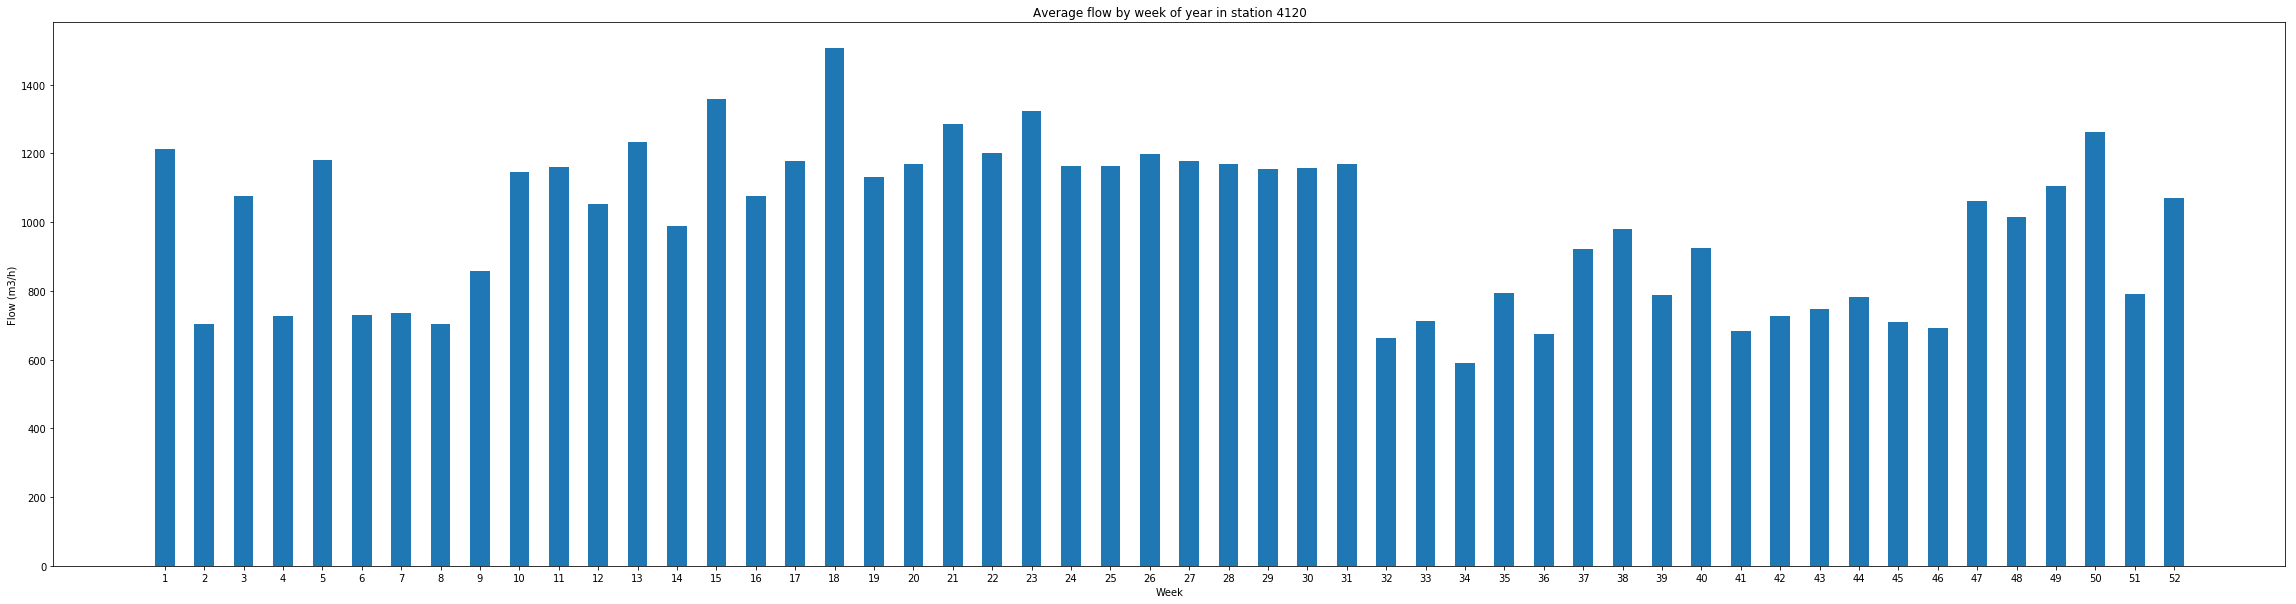

In [14]:
f, ax = plt.subplots(figsize=(40, 10))
rects1 = ax.bar(df_4120_week.TimeStamp, df_4120_week.Value,width=0.5)
ax.set_title('Average flow by week of year in station 4120')
ax.set_xticks(np.arange(1,53))
ax.set(xlabel='Week',ylabel='Flow (m3/h)')

[Text(0,0.5,u'Flow (m3/h)'), Text(0.5,0,u'Week')]

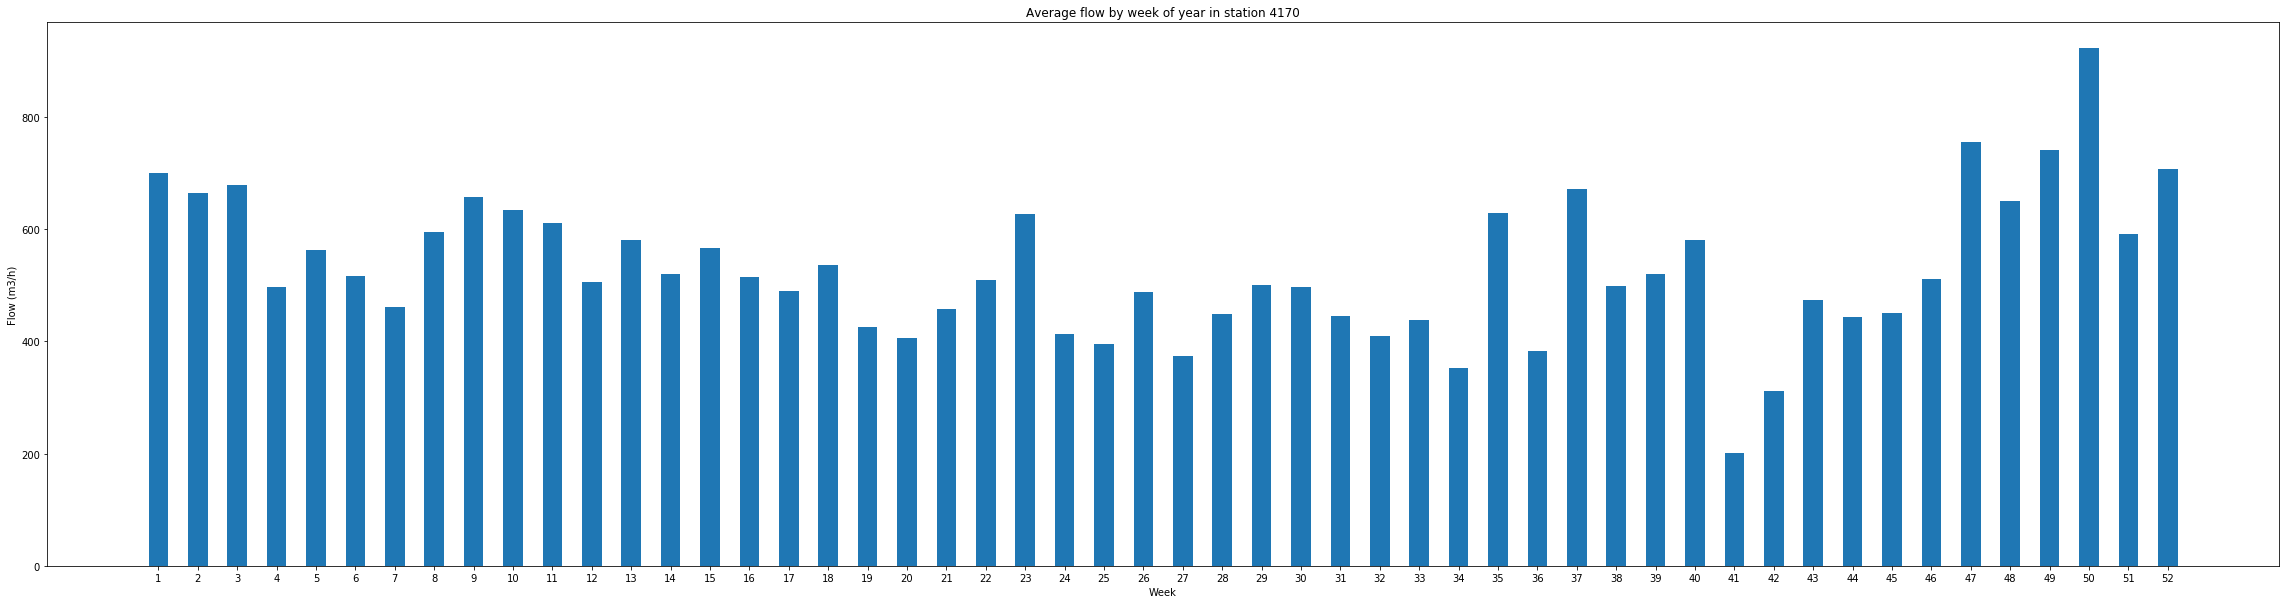

In [15]:
f, ax = plt.subplots(figsize=(40, 10))
rects1 = ax.bar(df_4170_week.TimeStamp, df_4170_week.Value,width=0.5)
ax.set_title('Average flow by week of year in station 4170')
ax.set_xticks(np.arange(1,53))
ax.set(xlabel='Week',ylabel='Flow (m3/h)')

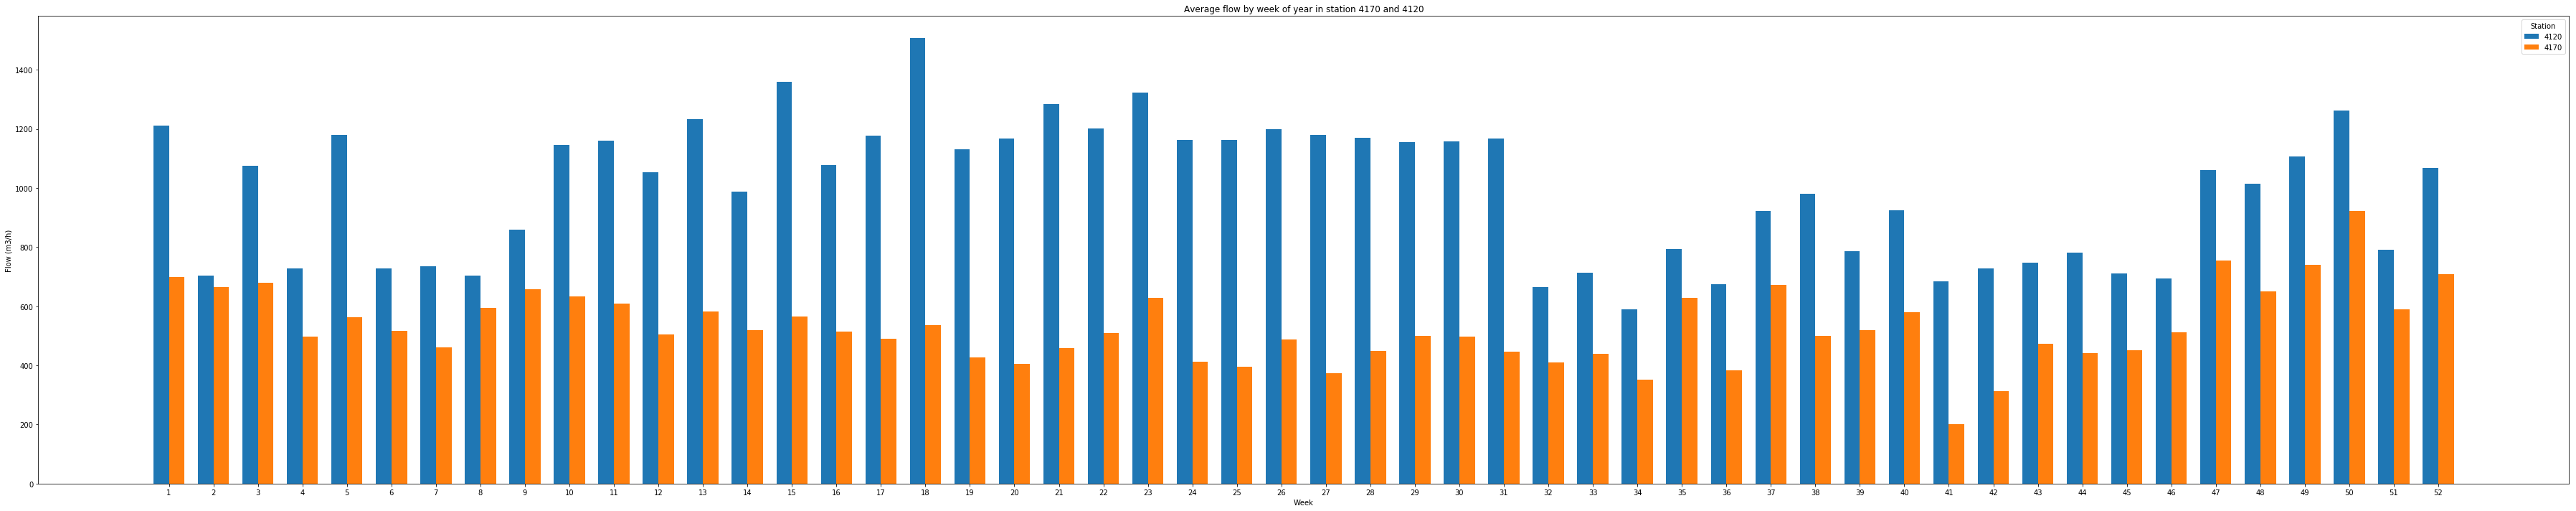

In [16]:
bar_width = 0.35
idx = np.arange(1,53)
fig, ax = plt.subplots(figsize=(50, 10))
rects1 = ax.bar(idx, df_4120_week.Value,width=bar_width,label='4120')
rects2 = ax.bar(idx+bar_width, df_4170_week.Value,width=bar_width,label='4170')
ax.set_title('Average flow by week of year in station 4170 and 4120')
ax.set_xticks(idx + bar_width/2)
ax.set_xticklabels(idx)
ax.legend(title="Station")
ax.set(xlabel='Week',ylabel='Flow (m3/h)')
fig.tight_layout()